# Mermaid AI demonstration

# Get started with the Gemini API: Python

## Setup

In [2]:
!pip3 install -q -U google-generativeai

### Import packages

Import the necessary packages.

In [3]:
import pathlib
import textwrap

import google.generativeai as genai

from IPython.display import display
from IPython.display import Markdown


def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

### Setup API key

<a class="button button-primary" href="https://makersuite.google.com/app/apikey" target="_blank" rel="noopener noreferrer">Get an API key</a>

In [4]:
pip install python-dotenv

Note: you may need to restart the kernel to use updated packages.


In [6]:
from dotenv import load_dotenv
import os

load_dotenv()

api_key = os.getenv('API_KEY')

In [7]:
genai.configure(api_key=api_key)

## Avaliable models

* `gemini-1.5-pro`: optimized for high intelligence tasks, the most powerful Gemini model
* `gemini-1.5-flash`: optimized for multi-modal use-cases where speed and cost are important

In [8]:
for m in genai.list_models():
  if 'generateContent' in m.supported_generation_methods:
    print(m.name)

models/gemini-1.0-pro
models/gemini-1.0-pro-001
models/gemini-1.0-pro-latest
models/gemini-1.0-pro-vision-latest
models/gemini-1.5-flash
models/gemini-1.5-flash-001
models/gemini-1.5-flash-latest
models/gemini-1.5-pro
models/gemini-1.5-pro-001
models/gemini-1.5-pro-latest
models/gemini-pro
models/gemini-pro-vision


## Generate text from text inputs

For text-only prompts, use the `gemini-pro` model:

In [9]:
model = genai.GenerativeModel('gemini-1.5-flash')

The `generate_content` method can handle a wide variety of use cases, including multi-turn chat and multimodal input, depending on what the underlying model supports. The available models only support text and images as input, and text as output.

In the simplest case, you can pass a prompt string to the <a href="https://ai.google.dev/api/python/google/generativeai/GenerativeModel#generate_content"><code>GenerativeModel.generate_content</code></a> method:

In [10]:
%%time
response = model.generate_content("Explain what is Mermaid JS and tell its use cases?")

CPU times: user 14.6 ms, sys: 11.5 ms, total: 26.2 ms
Wall time: 7.75 s


In simple cases, the `response.text` accessor is all you need. To display formatted Markdown text, use the `to_markdown` function:

In [11]:
to_markdown(response.text)

> ## Mermaid.js: A Visual Language for Diagrams in Your Docs
> 
> Mermaid.js is a JavaScript library that lets you **create various diagrams and flowcharts directly within your Markdown files.** It uses a simple, text-based syntax that you can easily embed into your documentation, presentations, or even websites. 
> 
> **Here's what makes Mermaid.js so special:**
> 
> * **Easy to Learn:** Its syntax is intuitive and readable, even for those unfamiliar with diagram software.
> * **Versatile:** It supports various diagram types, including:
>     * **Flowcharts:** Depicting workflows and processes.
>     * **Sequence Diagrams:** Illustrating interaction sequences between objects.
>     * **Gantt Charts:** Visualizing project timelines and tasks.
>     * **Class Diagrams:** Representing relationships between classes in object-oriented programming.
>     * **State Diagrams:** Showing state transitions in a system.
>     * **Entity Relationship Diagrams (ERDs):** Modeling data relationships in databases.
>     * **User Journey Maps:** Mapping user interactions and experiences.
>     * **Pie Charts, Bar Charts, and more:** For data visualization.
> * **Interactive:** Mermaid diagrams can be rendered interactively, allowing users to zoom, pan, and explore the diagram details.
> * **Cross-Platform:** It works with various markdown editors and platforms like Github, Gitlab, Notion, and more.
> 
> **Use Cases:**
> 
> Mermaid.js is widely used in various scenarios, including:
> 
> * **Documentation:** Creating clear and concise documentation for software, products, or processes.
> * **Project Management:** Visualizing project timelines, dependencies, and tasks with Gantt charts.
> * **Software Development:** Illustrating software architecture, class relationships, and workflows with diagrams.
> * **Presentations:** Enhancing presentations with visually appealing diagrams and charts.
> * **Education:** Explaining complex concepts with easy-to-understand diagrams.
> * **Web Development:** Integrating interactive diagrams directly into web pages.
> * **Data Visualization:** Creating charts and graphs to present data effectively.
> 
> **Example:**
> 
> Here's a simple example of a flowchart created using Mermaid.js:
> 
> ```mermaid
> graph LR
>     A[Start] --> B{Is it raining?}
>     B -- Yes --> C[Take an umbrella]
>     B -- No --> D[Enjoy the sunshine]
> ```
> 
> This code generates a flowchart with nodes labeled "Start," "Is it raining?," "Take an umbrella," and "Enjoy the sunshine." The arrows indicate the flow of logic based on whether it's raining or not.
> 
> **Benefits of using Mermaid.js:**
> 
> * **Improved Clarity and Communication:** Diagrams simplify complex information and make it easier to understand.
> * **Increased Efficiency:** Creating diagrams is fast and easy, reducing the time needed for documentation and presentations.
> * **Enhanced Collaboration:**  Shared diagrams promote communication and understanding among team members.
> * **Scalability:**  Mermaid.js can handle complex diagrams with numerous nodes and connections.
> * **Integration with Existing Tools:** It seamlessly integrates with popular markdown editors and platforms.
> 
> Overall, Mermaid.js provides a powerful and versatile tool for creating visually appealing diagrams and enhancing communication in various contexts.

If the API failed to return a result, use `GenerateContentResponse.prompt_feedback` to see if it was blocked due to safety concerns regarding the prompt.

In [12]:
base = "Provide me mermaid code for the following usecase. If not specified, create a graph or a flowchart for the situation. Only and only give me the mermaid code, nothing else. No plain text, I am passing this code to an compiler that will generate charts from your response so I dont want any syntax errors. Here is the user query:"

response = model.generate_content(f'{base} Instagram buisness model in vertical graph and sub graphs as well')
to_markdown(response.text)

> ```mermaid
> graph LR
>     subgraph Instagram Business Model
>         A[Users] --> B{Content Creation & Sharing}
>         B --> C[Engagement & Interaction]
>         C --> D[Data Collection & Analysis]
>         D --> E[Targeted Advertising]
>         E --> F[Revenue Generation]
>         F --> A
>     end
>     subgraph Content Creation & Sharing
>         B1[Photo & Video Sharing]
>         B2[Stories & Reels]
>         B3[Live Streaming]
>         B4[Direct Messaging]
>         B5[Influencer Marketing]
>         B1 --> B
>         B2 --> B
>         B3 --> B
>         B4 --> B
>         B5 --> B
>     end
>     subgraph Engagement & Interaction
>         C1[Likes & Comments]
>         C2[Shares & Saves]
>         C3[Follows & Unfollows]
>         C4[Hashtags & Explore Tab]
>         C5[Brand Mentions & Influencer Partnerships]
>         C1 --> C
>         C2 --> C
>         C3 --> C
>         C4 --> C
>         C5 --> C
>     end
>     subgraph Data Collection & Analysis
>         D1[User Demographics & Interests]
>         D2[Content Performance Metrics]
>         D3[Engagement Patterns]
>         D4[Behavioral Data]
>         D1 --> D
>         D2 --> D
>         D3 --> D
>         D4 --> D
>     end
>     subgraph Targeted Advertising
>         E1[In-Feed Ads]
>         E2[Story Ads]
>         E3[Reels Ads]
>         E4[Shopping Ads]
>         E5[Audience Targeting]
>         E1 --> E
>         E2 --> E
>         E3 --> E
>         E4 --> E
>         E5 --> E
>     end
>     subgraph Revenue Generation
>         F1[Ad Revenue]
>         F2[Subscription Services]
>         F3[E-commerce & Shopping]
>         F1 --> F
>         F2 --> F
>         F3 --> F
>     end
> ```

In [13]:
response.prompt_feedback

Gemini can generate multiple possible responses for a single prompt. These possible responses are called `candidates`, and you can review them to select the most suitable one as the response.

View the response candidates with <a href="https://ai.google.dev/api/python/google/ai/generativelanguage/GenerateContentResponse#candidates"><code>GenerateContentResponse.candidates</code></a>:

In [14]:
response.candidates

[index: 0
content {
  parts {
    text: "```mermaid\ngraph LR\n    subgraph Instagram Business Model\n        A[Users] --> B{Content Creation & Sharing}\n        B --> C[Engagement & Interaction]\n        C --> D[Data Collection & Analysis]\n        D --> E[Targeted Advertising]\n        E --> F[Revenue Generation]\n        F --> A\n    end\n    subgraph Content Creation & Sharing\n        B1[Photo & Video Sharing]\n        B2[Stories & Reels]\n        B3[Live Streaming]\n        B4[Direct Messaging]\n        B5[Influencer Marketing]\n        B1 --> B\n        B2 --> B\n        B3 --> B\n        B4 --> B\n        B5 --> B\n    end\n    subgraph Engagement & Interaction\n        C1[Likes & Comments]\n        C2[Shares & Saves]\n        C3[Follows & Unfollows]\n        C4[Hashtags & Explore Tab]\n        C5[Brand Mentions & Influencer Partnerships]\n        C1 --> C\n        C2 --> C\n        C3 --> C\n        C4 --> C\n        C5 --> C\n    end\n    subgraph Data Collection & Analysis\n

By default, the model returns a response after completing the entire generation process. You can also stream the response as it is being generated, and the model will return chunks of the response as soon as they are generated.

To stream responses, use <a href="https://ai.google.dev/api/python/google/generativeai/GenerativeModel#generate_content"><code>GenerativeModel.generate_content(..., stream=True)</code></a>.

In [15]:
%%time
response = model.generate_content("Explain what is Mermaid JS and tell its use cases?", stream=True)

CPU times: user 3.88 ms, sys: 3.41 ms, total: 7.29 ms
Wall time: 734 ms


In [16]:
for chunk in response:
  print(chunk.text)
  print("_"*80)

##
________________________________________________________________________________
 What is Mermaid.js?

Mermaid.js is a JavaScript library that allows
________________________________________________________________________________
 you to create diagrams and flowcharts directly within your markdown files. It uses a
________________________________________________________________________________
 simple and intuitive syntax to define your diagrams, which are then rendered into beautiful and interactive visualizations. 

Here's a breakdown of key features:

*
________________________________________________________________________________
 **Easy to use:** Its syntax is simple and readable, resembling plain text. This makes it accessible for users with different technical backgrounds.
* **Versatile:**
________________________________________________________________________________
 Supports a wide variety of diagrams including flowcharts, sequence diagrams, class diagrams, state diagr

When streaming, some response attributes are not available until you've iterated through all the response chunks. This is demonstrated below:

In [17]:
response = model.generate_content("Explain what is Mermaid JS and tell its use cases?", stream=True)

The `prompt_feedback` attribute works:

In [18]:
response.prompt_feedback

But attributes like <code>text</code> do not:

In [19]:
try:
  response.text
except Exception as e:
  print(f'{type(e).__name__}: {e}')

IncompleteIterationError: Please let the response complete iteration before accessing the final accumulated
attributes (or call `response.resolve()`)


## Generate text from image and text inputs

Gemini provides a multimodal model (`gemini-pro-vision`) that accepts both text and images and inputs. The `GenerativeModel.generate_content` API is designed to handle multimodal prompts and returns a text output.

Let's include an image:

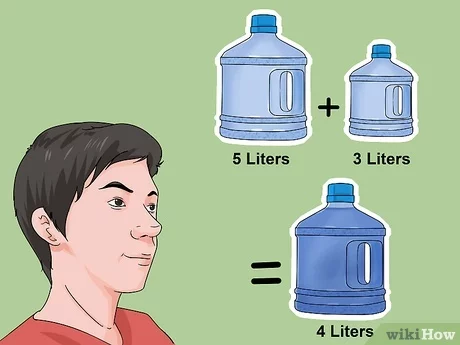

In [22]:
import PIL.Image

img = PIL.Image.open('water-jug.jpeg')
img

Use the `gemini-1.5-flash` model and pass the image to the model with `generate_content`.

In [23]:
model = genai.GenerativeModel('gemini-1.5-flash')

In [24]:
response = model.generate_content(img)

to_markdown(response.text)

> This image shows a math equation with water jugs. 5 liters + 3 liters = 8 liters.  There is a person looking at the equation with a confused expression on their face.

To provide both text and images in a prompt, pass a list containing the strings and images:

In [26]:
response = model.generate_content([f'{base} This is a classic mathematics and computer science problem that involves using comcepts of backtracking and search algorithms called waterjug problem. Create a flowchart to create an algorithm for solving this problem givin the capacity of the 2 inputs and the expected result', img], stream=True)
response.resolve()

In [27]:
to_markdown(response.text)

> ```mermaid
> graph LR
>     subgraph Start
>         A[Initialize state]
>     end
>     A --> B{Fill 5L jug}
>     B --> C{Fill 3L jug}
>     C --> D{Pour 3L jug into 5L jug}
>     D --> E{Fill 3L jug}
>     E --> F{Pour 3L jug into 5L jug until full}
>     F --> G{Empty 5L jug}
>     G --> H{Pour 3L jug into 5L jug}
>     H --> I{Fill 3L jug}
>     I --> J{Pour 3L jug into 5L jug until full}
>     J --> K{Empty 5L jug}
>     K --> L{Pour 3L jug into 5L jug}
>     L --> M{Fill 3L jug}
>     M --> N{Pour 3L jug into 5L jug until full}
>     N --> O{Empty 5L jug}
>     O --> P{Pour 3L jug into 5L jug}
>     P --> Q{Fill 3L jug}
>     Q --> R{Pour 3L jug into 5L jug until full}
>     R --> S{Empty 5L jug}
>     S --> T{Pour 3L jug into 5L jug}
>     T --> U{Fill 3L jug}
>     U --> V{Pour 3L jug into 5L jug until full}
>     V --> W{Empty 5L jug}
>     W --> X{Pour 3L jug into 5L jug}
>     X --> Y{Fill 3L jug}
>     Y --> Z{Pour 3L jug into 5L jug until full}
>     Z --> A{Check if 4L is in 5L jug}
>     A --> end{End}
> ```

## Chat conversations

Gemini enables you to have freeform conversations across multiple turns. The `ChatSession` class simplifies the process by managing the state of the conversation, so unlike with `generate_content`, you do not have to store the conversation history as a list.

Initialize the chat:

In [28]:
model = genai.GenerativeModel('gemini-1.5-flash')
chat = model.start_chat(history=[])
chat

ChatSession(
    model=genai.GenerativeModel(
        model_name='models/gemini-1.5-flash',
        generation_config={},
        safety_settings={},
        tools=None,
        system_instruction=None,
    ),
    history=[]
)

The `ChatSession.send_message` method returns the same `GenerateContentResponse` type as <a href="https://ai.google.dev/api/python/google/generativeai/GenerativeModel#generate_content"><code>GenerativeModel.generate_content</code></a>. It also appends your message and the response to the chat history:

In [29]:
response = chat.send_message("In one sentence, explain how a computer works to a young child.")
to_markdown(response.text)

> A computer is like a super smart toy that follows your instructions and shows you cool things on its screen. 


In [30]:
chat.history

[parts {
   text: "In one sentence, explain how a computer works to a young child."
 }
 role: "user",
 parts {
   text: "A computer is like a super smart toy that follows your instructions and shows you cool things on its screen. \n"
 }
 role: "model"]

You can keep sending messages to continue the conversation. Use the `stream=True` argument to stream the chat:

In [31]:
response = chat.send_message("Okay, how about a more detailed explanation to a high schooler?", stream=True)

for chunk in response:
  print(chunk.text)
  print("_"*80)

A
________________________________________________________________________________
 computer is essentially a complex calculator that follows a set of instructions, called a program
________________________________________________________________________________
, to process data, perform calculations, and display results, all while interacting with
________________________________________________________________________________
 the world through input devices like keyboards and output devices like screens. 

________________________________________________________________________________


`glm.Content` objects contain a list of `glm.Part` objects that each contain either a text (string) or inline_data (`glm.Blob`), where a blob contains binary data and a `mime_type`. The chat history is available as a list of `glm.Content` objects in `ChatSession.history`:

In [32]:
for message in chat.history:
  display(to_markdown(f'**{message.role}**: {message.parts[0].text}'))

> **user**: In one sentence, explain how a computer works to a young child.

> **model**: A computer is like a super smart toy that follows your instructions and shows you cool things on its screen. 


> **user**: Okay, how about a more detailed explanation to a high schooler?

> **model**: A computer is essentially a complex calculator that follows a set of instructions, called a program, to process data, perform calculations, and display results, all while interacting with the world through input devices like keyboards and output devices like screens. 


## Count tokens

Large language models have a context window, and the context length is often measured in terms of the **number of tokens**. With the Gemini API, you can determine the number of tokens per any `glm.Content` object. In the simplest case, you can pass a query string to the `GenerativeModel.count_tokens` method as follows:

In [33]:
model.count_tokens("Explain what is Mermaid JS and tell its use cases?")

total_tokens: 11

Similarly, you can check `token_count` for your `ChatSession`:

In [34]:
model.count_tokens(chat.history)

total_tokens: 103

## Use embeddings

[Embedding](https://developers.google.com/machine-learning/glossary#embedding-vector) is a technique used to represent information as a list of floating point numbers in an array. With Gemini, you can represent text (words, sentences, and blocks of text) in a vectorized form, making it easier to compare and contrast embeddings. For example, two texts that share a similar subject matter or sentiment should have similar embeddings, which can be identified through mathematical comparison techniques such as cosine similarity. For more on how and why you should use embeddings, refer to the [Embeddings guide](https://ai.google.dev/docs/embeddings_guide).

Use the `embed_content` method to generate embeddings. The method handles embedding for the following tasks (`task_type`):

Task Type | Description
---       | ---
RETRIEVAL_QUERY	| Specifies the given text is a query in a search/retrieval setting.
RETRIEVAL_DOCUMENT | Specifies the given text is a document in a search/retrieval setting. Using this task type requires a `title`.
SEMANTIC_SIMILARITY	| Specifies the given text will be used for Semantic Textual Similarity (STS).
CLASSIFICATION	| Specifies that the embeddings will be used for classification.
CLUSTERING	| Specifies that the embeddings will be used for clustering.

The following generates an embedding for a single string for document retrieval:

In [35]:
result = genai.embed_content(
    model="models/text-embedding-004",
    content="What is the meaning of life?",
    task_type="retrieval_document",
    title="Embedding of single string")

# 1 input > 1 vector output
print(str(result['embedding'])[:50], '... TRIMMED]')

[-0.028545432, 0.044588123, -0.03419736, -0.004266 ... TRIMMED]


Note: The `retrieval_document` task type is the only task that accepts a title.

To handle batches of strings, pass a list of strings in `content`:

In [36]:
result = genai.embed_content(
    model="models/text-embedding-004",
    content=[
      'What is the meaning of life?',
      'How much wood would a woodchuck chuck?',
      'How does the brain work?'],
    task_type="retrieval_document",
    title="Embedding of list of strings")

# A list of inputs > A list of vectors output
for v in result['embedding']:
  print(str(v)[:50], '... TRIMMED ...')

[-0.036453035, 0.03325499, -0.03970925, -0.0026286 ... TRIMMED ...
[-0.01591948, 0.032582667, -0.081024624, -0.011298 ... TRIMMED ...
[0.00037063262, 0.03763057, -0.12269569, -0.009518 ... TRIMMED ...


While the `genai.embed_content` function accepts simple strings or lists of strings, it is actually built around the `glm.Content` type (like <a href="https://ai.google.dev/api/python/google/generativeai/GenerativeModel#generate_content"><code>GenerativeModel.generate_content</code></a>). `glm.Content` objects are the primary units of conversation in the API.

While the `glm.Content` object is multimodal, the `embed_content` method only supports text embeddings. This design gives the API the *possibility* to expand to multimodal embeddings.

In [37]:
response.candidates[0].content

parts {
  text: "A computer is essentially a complex calculator that follows a set of instructions, called a program, to process data, perform calculations, and display results, all while interacting with the world through input devices like keyboards and output devices like screens. \n"
}
role: "model"

In [38]:
result = genai.embed_content(
    model = 'models/text-embedding-004',
    content = response.candidates[0].content)

# 1 input > 1 vector output
print(str(result['embedding'])[:50], '... TRIMMED ...')

[0.03312565, 0.0243179, -0.031792443, -0.022744711 ... TRIMMED ...


Similarly, the chat history contains a list of `glm.Content` objects, which you can pass directly to the `embed_content` function:

In [39]:
chat.history

[parts {
   text: "In one sentence, explain how a computer works to a young child."
 }
 role: "user",
 parts {
   text: "A computer is like a super smart toy that follows your instructions and shows you cool things on its screen. \n"
 }
 role: "model",
 parts {
   text: "Okay, how about a more detailed explanation to a high schooler?"
 }
 role: "user",
 parts {
   text: "A computer is essentially a complex calculator that follows a set of instructions, called a program, to process data, perform calculations, and display results, all while interacting with the world through input devices like keyboards and output devices like screens. \n"
 }
 role: "model"]

In [40]:
result = genai.embed_content(
    model = 'models/text-embedding-004',
    content = chat.history)

# 1 input > 1 vector output
for i,v in enumerate(result['embedding']):
  print(str(v)[:50], '... TRIMMED...')

[-0.03417175, 0.005179209, -0.054957863, -0.030872 ... TRIMMED...
[-0.05000688, 0.03731681, -0.02178283, 0.002887704 ... TRIMMED...
[0.032410417, 0.036596797, -0.04735078, -0.0301925 ... TRIMMED...
[0.03312565, 0.0243179, -0.031792443, -0.022744711 ... TRIMMED...


## Advanced use cases

The following sections discuss advanced use cases and lower-level details of the Python SDK for the Gemini API.

### Safety settings

The `safety_settings` argument lets you configure what the model blocks and allows in both prompts and responses. By default, safety settings block content with medium and/or high probability of being unsafe content across all dimensions. Learn more about [Safety settings](https://ai.google.dev/docs/safety_setting).

Enter a questionable prompt and run the model with the default safety settings, and it will not return any candidates:

In [41]:
response = model.generate_content('[Is mermaid js really useful?]')
response.candidates

[index: 0
content {
  parts {
    text: "Let\'s discuss whether Mermaid.js is genuinely useful, and when it might be a good fit for your projects.\n\n**What is Mermaid.js?**\n\nMermaid.js is a JavaScript library that lets you create diagrams and flowcharts using a simple, text-based syntax. It then renders these diagrams beautifully in your web pages. It\'s particularly handy for:\n\n* **Flowcharts:** Representing processes, workflows, and algorithms.\n* **Sequence Diagrams:** Showing interactions between objects or components.\n* **Gantt Charts:** Visualizing project timelines and tasks.\n* **Class Diagrams:** Modeling object-oriented structures.\n* **State Diagrams:** Depicting the states of a system and transitions between them.\n\n**Why Mermaid.js Might be Useful:**\n\n* **Simplicity:**  Its syntax is easy to learn, especially for people familiar with Markdown.\n* **Lightweight:** It\'s relatively small, making it easy to include in your projects.\n* **Dynamic:**  Diagrams can be u

The `prompt_feedback` will tell you which safety filter blocked the prompt:

In [42]:
response.prompt_feedback

Now provide the same prompt to the model with newly configured safety settings, and you may get a response.

In [43]:
response = model.generate_content('[Is mermaid JS really useful]',
                                  safety_settings={'HARASSMENT':'block_none'})
response.text

"## Is Mermaid.js Really Useful?\n\nMermaid.js is a powerful tool, and its usefulness depends on your needs and context. Here's a breakdown:\n\n**Pros:**\n\n* **Easy to learn and use:** Its simple syntax and intuitive design make it accessible to beginners.\n* **Versatile:** It supports various diagram types, including flowcharts, sequence diagrams, Gantt charts, state diagrams, class diagrams, entity relationship diagrams, and more.\n* **Interactive and dynamic:** You can create interactive diagrams that respond to user input.\n* **Integration:** It seamlessly integrates with popular tools like Markdown, Jekyll, and GitLab.\n* **Open-source and free:** You can use it without any licensing costs.\n\n**Cons:**\n\n* **Limited features compared to professional tools:** While versatile, Mermaid.js lacks the advanced customization and features found in dedicated diagramming software.\n* **Not ideal for complex diagrams:**  For extremely intricate diagrams, other tools might be better suited

Also note that each candidate has its own `safety_ratings`, in case the prompt passes but the individual responses fail the safety checks.

### Encode messages

The previous sections relied on the SDK to make it easy for you to send prompts to the API. This section offers a fully-typed equivalent to the previous example, so you can better understand the lower-level details regarding how the SDK encodes messages.

Underlying the Python SDK is the <a href="https://ai.google.dev/api/python/google/ai/generativelanguage"><code>google.ai.generativelanguage</code></a> client library:

In [44]:
import google.ai.generativelanguage as glm

The SDK attempts to convert your message to a `glm.Content` object, which contains a list of `glm.Part` objects that each contain either:

1. a <a href="https://www.tensorflow.org/text/api_docs/python/text"><code>text</code></a> (string)
2. `inline_data` (`glm.Blob`), where a blob contains binary `data` and a `mime_type`.

You can also pass any of these classes as an equivalent dictionary.

Note: The only accepted mime types are some image types, `image/*`.

So, the fully-typed equivalent to the previous example is:  

In [46]:
model = genai.GenerativeModel('gemini-1.5-flash')
response = model.generate_content(
    glm.Content(
        parts = [
            glm.Part(text="Write a short, engaging blog post based on this picture."),
            glm.Part(
                inline_data=glm.Blob(
                    mime_type='image/jpeg',
                    data=pathlib.Path('water-jug.jpeg').read_bytes()
                )
            ),
        ],
    ),
    stream=True)

In [47]:
response.resolve()

to_markdown(response.text[:100] + "... [TRIMMED] ...")

> ##  Is This Math Even Possible? 
> 
> This image claims to show the result of adding a 5-liter jug and a... [TRIMMED] ...

In [49]:
to_markdown(response.text)

> ##  Is This Math Even Possible? 
> 
> This image claims to show the result of adding a 5-liter jug and a 3-liter jug, with the result being a 4-liter jug.  Clearly, this is impossible.  A simple understanding of addition tells us that 5 + 3 = 8, not 4. So what's going on here? 
> 
> It seems like someone is trying to trick us with a visual illusion.  While the jugs are presented as different sizes, they might not be accurately representing the amount of liquid they hold. 
> 
> Let's remember that appearances can be deceiving. When dealing with numbers, always rely on the actual calculations rather than relying on a picture to tell the story. 


### Multi-turn conversations

While the `genai.ChatSession` class shown earlier can handle many use cases, it does make some assumptions. If your use case doesn't fit into this chat implementation it's good to remember that `genai.ChatSession` is just a wrapper around <a href="https://ai.google.dev/api/python/google/generativeai/GenerativeModel#generate_content"><code>GenerativeModel.generate_content</code></a>. In addition to single requests, it can handle multi-turn conversations.

The individual messages are `glm.Content` objects or compatible dictionaries, as seen in previous sections. As a dictionary, the message requires `role` and `parts` keys. The `role` in a conversation can either be the `user`, which provides the prompts, or `model`, which provides the responses.

Pass a list of `glm.Content` objects and it will be treated as multi-turn chat:

In [50]:
model = genai.GenerativeModel('gemini-1.5-flash')

messages = [
    {'role':'user',
     'parts': ["Briefly explain how a computer works to a young child."]}
]
response = model.generate_content(messages)

to_markdown(response.text)

> Imagine a computer like a really smart toy that can do lots of things! It has a brain called a **CPU** which is like your own brain. It can follow instructions and make decisions.
> 
> The computer also has a special box called **memory** where it stores all the information it needs to work, like a big notebook.
> 
> To talk to the computer, you use something called a **keyboard** or a **mouse**. It's like telling your toy what to do!
> 
> The computer also has a special screen called a **monitor** to show you all the things it's doing, just like a TV.
> 
> When you type something on the keyboard or click the mouse, the computer's brain reads your instructions and does what you ask. It can draw pictures, play games, or even show you videos!
> 
> So, a computer is a really smart toy that can do amazing things, but it needs your instructions to know what to do! 


To continue the conversation, add the response and another message.

Note: For multi-turn conversations, you need to send the whole conversation history with each request. The API is **stateless**.

In [51]:
messages.append({'role':'model',
                 'parts':[response.text]})

messages.append({'role':'user',
                 'parts':["Okay, how about a more detailed explanation to a high school student?"]})

response = model.generate_content(messages)

to_markdown(response.text)

> Here's a more detailed explanation for a high school student:
> 
> A computer is essentially a complex machine that processes information. It works by combining hardware and software:
> 
> **Hardware:**
> 
> * **CPU (Central Processing Unit):** This is the "brain" of the computer, responsible for executing instructions and performing calculations. It's like the control center that makes all the decisions.
> * **Memory (RAM):** This is like the computer's short-term memory. It holds data and instructions that are currently being used by the CPU. Think of it as the information you have readily available on your desk.
> * **Storage (Hard Drive/SSD):** This is the computer's long-term memory. It stores all the programs and data you need, even when the computer is turned off. Think of it like the filing cabinet that holds all your documents.
> * **Input Devices (Keyboard, Mouse):** These are how you interact with the computer. They allow you to input information and commands.
> * **Output Devices (Monitor, Speakers):** These are how the computer displays and communicates information back to you.
> 
> **Software:**
> 
> * **Operating System (OS):** This is the software that manages all the hardware and allows you to interact with the computer. Think of it as the conductor of an orchestra, making sure everything runs smoothly.
> * **Applications (Programs):** These are the software tools that allow you to do specific tasks, like browsing the internet, creating documents, or playing games.
> 
> **How it Works:**
> 
> 1. **Input:** You enter information using input devices, like typing on a keyboard or clicking a mouse.
> 2. **Processing:** The CPU receives the information and processes it based on instructions from software.
> 3. **Output:** The processed information is displayed on output devices like a monitor or speakers.
> 4. **Storage:**  Information is stored in the computer's memory (RAM) for temporary use, or on the hard drive for long-term storage.
> 
> **In simple terms:**
> 
> Think of a computer as a tool that follows instructions. The CPU is the brain that executes those instructions. The software provides the instructions, and the hardware provides the physical components to carry them out. Together, they create a complex system that allows us to process information and perform countless tasks. 


### Generation configuration

The `generation_config` argument allows you to modify the generation parameters. Every prompt you send to the model includes parameter values that control how the model generates responses.

In [52]:
model = genai.GenerativeModel('gemini-1.5-flash')
response = model.generate_content(
    'Tell me a story about a magic backpack.',
    generation_config=genai.types.GenerationConfig(
        # Only one candidate for now.
        candidate_count=1,
        stop_sequences=['x'],
        temperature=1.0)
)

In [53]:
text = response.text
to_markdown(text)

> Elara, a girl with eyes the color of storm clouds and hair like spun moonlight, had always dreamed of adventure. Her small village nestled in the valley, surrounded by mountains that touched the sky, felt too small for her restless heart. One day, while e

## What's next

-   Prompt design is the process of creating prompts that elicit the desired response from language models. Writing well structured prompts is an essential part of ensuring accurate, high quality responses from a language model. Learn about best practices for [prompt writing](https://ai.google.dev/docs/prompt_best_practices).
-   Gemini offers several model variations to meet the needs of different use cases, such as input types and complexity, implementations for chat or other dialog language tasks, and size constraints. Learn about the available [Gemini models](https://ai.google.dev/models/gemini).
-   Gemini offers options for requesting [rate limit increases](https://ai.google.dev/docs/increase_quota). The rate limit for Gemini-Pro models is 60 requests per minute (RPM).